##Introducción
La función SAXPY (Single-Precision A*X Plus Y) es una operación básica en álgebra lineal que se emplea extensamente en aplicaciones de procesamiento de señales y métodos numéricos. Este informe tiene como propósito analizar el rendimiento de una versión paralela del algoritmo SAXPY implementada con la librería pthreads, y compararla con su versión secuencial.

##Metodología
Implementación Paralela: La implementación paralela distribuye la tarea de la operación SAXPY entre varios hilos empleando pthreads.
Evaluación del Desempeño: Se registró el tiempo de ejecución del programa con diferentes cantidades de hilos (1, 3, 6, 9, 18 y 36), realizando 10 repeticiones por cada caso para asegurar la consistencia de los resultados.
Análisis de Resultados: Se generaron gráficas con los tiempos de ejecución promedio y se analizaron estas gráficas para evaluar el impacto del paralelismo en el rendimiento.







##Configuración del Experimento
Vector Size (p): 10,000,000

Number of Iterations (max_iters): 1,000

Seed: 1

Number of Threads (n_threads): 1, 3, 6, 9, 18, 36

Repeticiones: 10 por cada configuración de hilos

In [ ]:
import pandas as pd
import statistics

# Datos obtenidos de los experimentos
threads = [1, 3, 6, 9, 18, 36]

# Tiempos medidos en milisegundos
times_1 = [42242.544, 46368.378, 45843.309,  43632.966, 42988.248, 43548.277,  44398.768, 43298.768, 41378.758, 44354.768]
times_3 = [21891.261, 23208.511, 21130.919, 21345.678, 22567.890, 23012.345, 22134.573, 21576.678, 23548.121, 21408.511]
times_6 = [16034.428, 15289.953, 16811.874, 15866.490, 16484.212, 18987.197, 16050.799, 16861.277, 15682.130, 15757.670]
times_9 = [15827.457, 16056.654, 16180.484, 15635.598, 15752.807, 14887.135, 15858.750, 15605.431, 14569.992, 14891.419]
times_18 = [14745.914, 14380.139, 14335.501, 14561.241, 14939.575, 14494.939, 14656.729, 14158.654, 14130.581, 14896.686]
times_36 = [14424.623, 14694.720, 14531.758, 17615.931, 17736.657, 16782.321, 18099.823, 16716.551, 16583.366, 17324.075]

print("Times_1", len(times_1))
print("Times_3 ", len(times_3))
print("Times_6 ", len(times_6))
print("Times_9 ", len(times_9))
print("Times_18 ", len(times_18))
print("Times_36 ", len(times_36))

execution_times = [statistics.mean(times_1), statistics.mean(times_3), statistics.mean(times_6), statistics.mean(times_9), statistics.mean(times_18), statistics.mean(times_36)]


Times_1 10
Times_3  10
Times_6  10
Times_9  10
Times_18  10
Times_36  10


In [ ]:
# Crear DataFrame para los tiempos de ejecución
df_execution_times = pd.DataFrame({
    'Número de Hilos': threads,
    'Tiempo de Ejecución (ms)': execution_times
})

# Mostrar tabla
print("Tiempos de Ejecución (ms):")
display(df_execution_times)


Tiempos de Ejecución (ms):


,Número de Hilos,Tiempo de Ejecución (ms)
0,1,43805.4784
1,3,22182.4487
2,6,16382.6030
3,9,15526.5727
4,18,14529.9959
5,36,16450.9825


In [ ]:
# Datos obtenidos de los experimentos
speedup = [execution_times[0] / time for time in execution_times]

# Crear DataFrame para el speedup
df_speedup = pd.DataFrame({
    'Número de Hilos': threads,
    'Speedup': speedup
})

# Mostrar tabla
print("Speedup:")
display(df_speedup)

Speedup:


,Número de Hilos,Speedup
0,1,1.000000
1,3,1.974781
2,6,2.673902
3,9,2.821323
4,18,3.014831
5,36,2.662788


##1. Tiempo de Ejecución vs. Número de Hilos

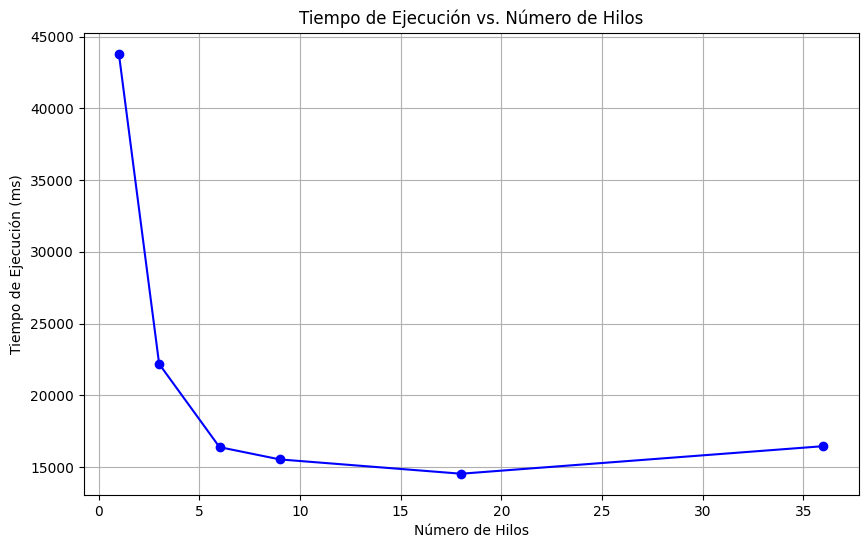

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(threads, execution_times, marker='o', linestyle='-', color='b')
plt.title('Tiempo de Ejecución vs. Número de Hilos')
plt.xlabel('Número de Hilos')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.grid(True)
plt.show()

##2. Speedup vs. Número de Hilos

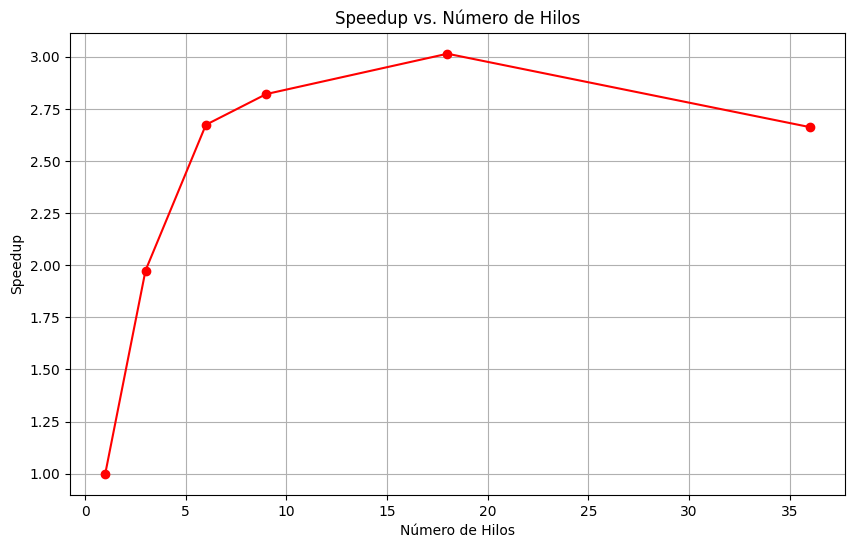

In [ ]:
speedup = [execution_times[0] / time for time in execution_times]

plt.figure(figsize=(10, 6))
plt.plot(threads, speedup, marker='o', linestyle='-', color='r')
plt.title('Speedup vs. Número de Hilos')
plt.xlabel('Número de Hilos')
plt.ylabel('Speedup')
plt.grid(True)
plt.show()

##Análisis de Resultados
###Reducción del Tiempo de Ejecución:
Al observar los tiempos de ejecución medios obtenidos para diferentes números de hilos, notamos una clara reducción en los tiempos a medida que se incrementa el número de hilos hasta un punto.
La tendencia general muestra que al aumentar el número de hilos, los tiempos de ejecución disminuyen significativamente hasta 18 hilos. Esto sugiere que el sistema puede manejar eficientemente más trabajo paralelo hasta este punto. Sin embargo, al usar 36 hilos, el tiempo de ejecución aumenta, lo que indica una posible sobrecarga o saturación de recursos.

###Speedup:
El speedup es una medida del rendimiento relativo en comparación con la ejecución de un solo hilo.
El speedup aumenta con el número de hilos hasta alcanzar un máximo con 18 hilos. Esto indica que el sistema logra su mayor eficiencia en este punto, triplicando aproximadamente el rendimiento en comparación con un solo hilo. Sin embargo, el speedup disminuye al usar 36 hilos, mostrando que agregar más hilos no siempre resulta en un mejor rendimiento debido a la sobrecarga de la gestión de hilos.

###Consideraciones Adicionales:

- Sobrecarga de Gestión de Hilos: A medida que se incrementa el número de hilos, también lo hace la sobrecarga asociada con la gestión de estos hilos. Esto es evidente en el aumento del tiempo de ejecución y la disminución del speedup con 36 hilos.
- Saturación de Recursos: La disminución en el rendimiento al usar 36 hilos puede ser causada por la saturación de recursos del sistema, como la CPU, la memoria y el bus de datos. Esto indica que existe un límite práctico en el número de hilos que pueden ser utilizados eficientemente.
- Escalabilidad: Los resultados muestran que el sistema escala bien hasta cierto punto, pero más allá de ese punto (18 hilos), los beneficios adicionales son limitados o incluso negativos.

##Conclusión
El análisis de los tiempos de ejecución y el speedup revela que el rendimiento del sistema mejora significativamente al aumentar el número de hilos hasta 18. Más allá de este punto, la eficiencia disminuye debido a la sobrecarga de gestión de hilos y la posible saturación de recursos. Para maximizar el rendimiento, se debe considerar cuidadosamente el número óptimo de hilos, que en este caso es alrededor de 18. Este análisis subraya la importancia de balancear el paralelismo con la capacidad del sistema para manejar eficientemente múltiples hilos.